# Benchmarking `gpujpeg` 📊

In [ ]:
%run benchmark_gpujpeg_LoLa.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [1]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    #'1920x1080': (1920, 1080),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
}

# Parameters to benchmark
QUALITIES = range(10, 101, 1)
FORMATS = ['interleaved']
SUBSAMPLINGS = ['4:2:0']
RESTART_INTERVALS = [0, 1, 2, 4, 8, 16, 32, 64, 128]

SUBSAMPLING_TO_PARAM = {
    '4:2:0': '420'
}

In [2]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results_gpujpeg_LoLa.csv')
df.head()

,Resolution,Quality,Format,Restart Interval,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD,Frame
0,1280x720,10,interleaved,8,4:2:0,1000,0.000438,0.211218,0.001066,0.000411,0.111776,0.000845,34.307,29.647232,0.805643,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
1,1280x720,11,interleaved,8,4:2:0,1000,0.000433,0.114351,0.000584,0.000412,0.111528,0.000846,35.555,29.980742,0.815013,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
2,1280x720,12,interleaved,8,4:2:0,1000,0.000431,0.112786,0.001066,0.000418,0.111770,0.000847,36.748,30.406513,0.825526,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
3,1280x720,13,interleaved,8,4:2:0,1000,0.000434,0.110510,0.001035,0.000412,0.111318,0.000831,38.025,30.900517,0.837351,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
4,1280x720,14,interleaved,8,4:2:0,1000,0.000436,0.113429,0.001052,0.000418,0.113102,0.000839,39.117,31.181707,0.843819,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1


In [4]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

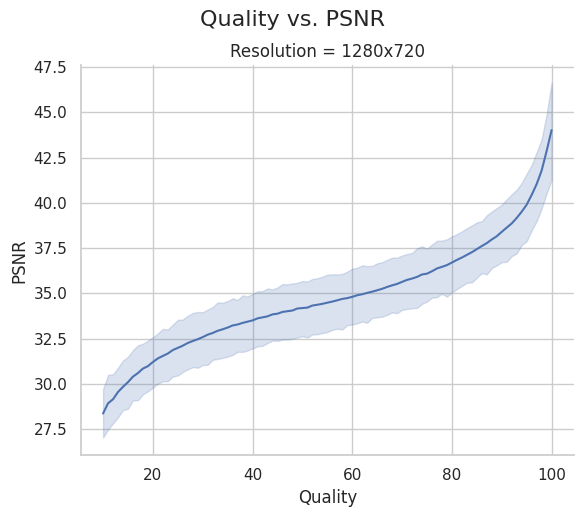

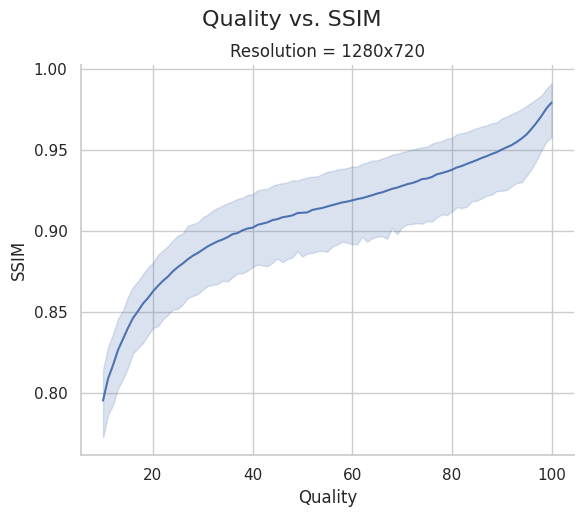

In [5]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


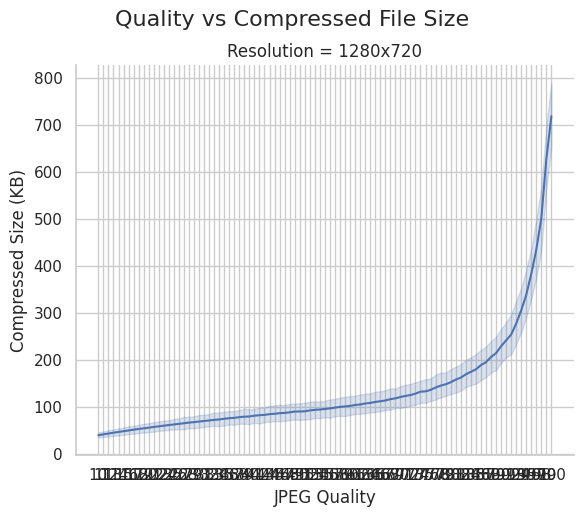

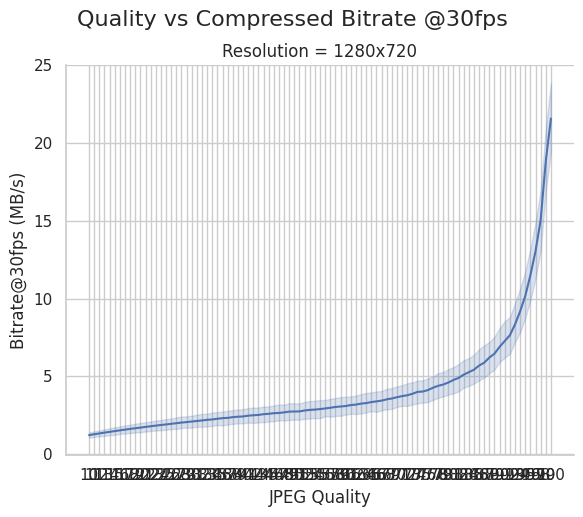

In [6]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
g.set(xticks=QUALITIES)
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
g.set(xticks=QUALITIES)
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

In [7]:
df = df[((df['Restart Interval'] == 8) & (df['Resolution'] == "1280x720")) | ((df['Restart Interval'] == 16) & (df['Resolution'] == "1920x1080"))]

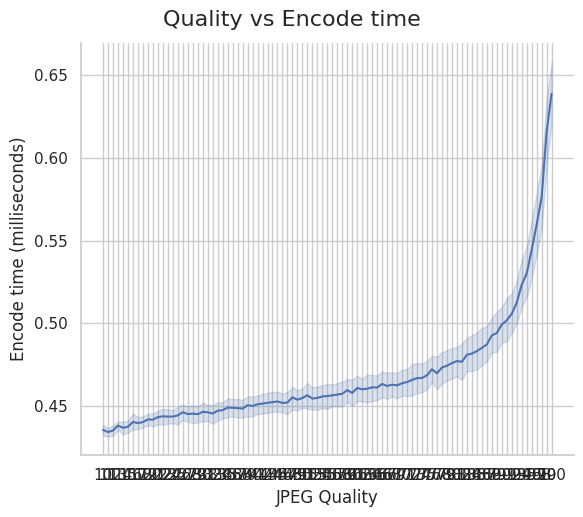

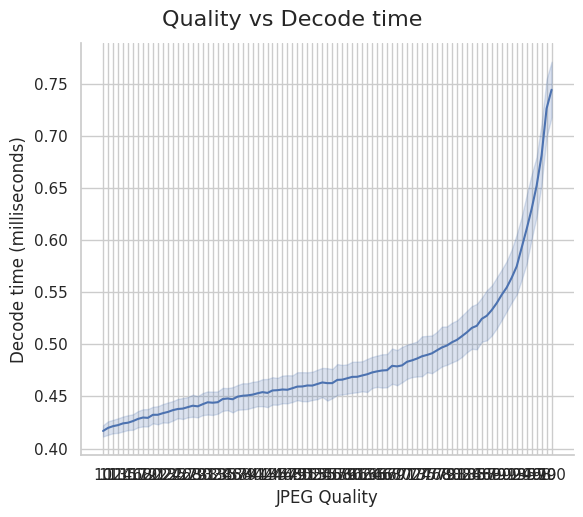

In [8]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
g.set(xticks=QUALITIES)
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
g.set(xticks=QUALITIES)
plt.show()

### Perform average avross frames

In [9]:
df_agg = df.groupby('Quality').agg({
    #'Quality': 'first',  # kept as-is (assuming same value across group)
    'Avg Encode Time (s)': 'mean',    # averaged
    'Avg Decode Time (s)': 'mean',
    'Compressed Size (KB)': 'mean',
    'PSNR': 'mean',
    'SSIM': 'mean',
}).reset_index()
df_agg

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
0,10,0.000436,0.000417,40.466143,28.373259,0.795244
1,11,0.000434,0.000420,42.278643,28.938460,0.808789
2,12,0.000435,0.000422,44.017000,29.161879,0.817126
3,13,0.000438,0.000423,45.837643,29.561741,0.826479
4,14,0.000437,0.000424,47.392000,29.845572,0.833329
...,...,...,...,...,...,...
86,96,0.000544,0.000630,383.240929,40.433411,0.963348
87,97,0.000560,0.000652,434.984214,41.029755,0.967167
88,98,0.000576,0.000681,501.497143,41.776604,0.971361
89,99,0.000616,0.000726,627.633000,42.848182,0.976049


In [10]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 2 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
90,100,0.000639,0.000744,719.390929,44.015695,0.979537
89,99,0.000616,0.000726,627.633000,42.848182,0.976049
88,98,0.000576,0.000681,501.497143,41.776604,0.971361
87,97,0.000560,0.000652,434.984214,41.029755,0.967167
86,96,0.000544,0.000630,383.240929,40.433411,0.963348


In [11]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 1.5 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1.5]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
90,100,0.000639,0.000744,719.390929,44.015695,0.979537
89,99,0.000616,0.000726,627.633000,42.848182,0.976049
88,98,0.000576,0.000681,501.497143,41.776604,0.971361
87,97,0.000560,0.000652,434.984214,41.029755,0.967167
86,96,0.000544,0.000630,383.240929,40.433411,0.963348


In [12]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1]
#df[df['Resolution'] == '1280x720'].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
90,100,0.000639,0.000744,719.390929,44.015695,0.979537
89,99,0.000616,0.000726,627.633000,42.848182,0.976049
88,98,0.000576,0.000681,501.497143,41.776604,0.971361
87,97,0.000560,0.000652,434.984214,41.029755,0.967167
86,96,0.000544,0.000630,383.240929,40.433411,0.963348


In [13]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 0.5 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 0.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 0.5]
#df[df['Resolution'] == '1280x720'].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
74,84,0.000482,0.000516,175.317786,37.274938,0.942757
73,83,0.000481,0.000512,170.037143,37.128505,0.941629
72,82,0.000477,0.000508,162.991857,36.980642,0.940313
71,81,0.000477,0.000504,158.752500,36.851501,0.939397
70,80,0.000476,0.000502,153.177714,36.705328,0.937965


In [21]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 0.46 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
46,56,0.000457,0.000463,97.587714,34.551456,0.916106
45,55,0.000456,0.000463,96.256500,34.489304,0.915271
44,54,0.000456,0.000463,95.196071,34.426140,0.914344
43,53,0.000455,0.000462,94.502071,34.375269,0.913797
42,52,0.000455,0.000460,93.173071,34.332362,0.913131
